# Behavioral data

## GABASnFR Gain adapation + Random gain

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from utils import *
from scipy.signal import medfilt
from scipy.stats import sem, ranksums
%matplotlib inline
%load_ext autoreload
%autoreload 2
sns.set(font_scale=2, style='ticks')
t_pre = 10 # time window pre-swim
t_post = 35 # time window post-swim
t_sig = 30 # time used for significance test after swim
t_len = t_pre+t_post

In [2]:
vol_file = '../Analysis/depreciated/analysis_sections_GA_RG_SnFR.csv'
dat_xls_file = pd.read_csv(vol_file)
dat_xls_file['folder'] = dat_xls_file['folder'].apply(lambda x: f'{x:0>8}')

In [3]:
swim_len_list = []
swim_type_list = []
swim_power_list = []
fish_id = []

for _, row in dat_xls_file.iterrows():
    folder = row['folder']
    fish = row['fish']
    task_type = row['task']
    if 'Delay' in task_type:
        continue
    _ = np.load(f'../Analysis/swim_power/{folder}_{fish}_swim_dat.npz')
    r_swim = _['r_swim']
    l_swim = _['l_swim']
    task_period = _['task_period'].astype('int')
    visu = _['visu']
    p_swim = r_swim + l_swim
    swim_starts = _['swim_starts']
    swim_ends = _['swim_ends']
    swim_len = swim_ends - swim_starts
    swim_type_list.extend(task_period)
    fish_id.extend([folder[:4]+'_'+fish[:5]]*len(swim_len))
    # fish_id.extend([folder+'_'+fish]*len(swim_len))
    swim_len_list.extend(swim_len)
    swim_power = np.zeros(len(swim_len))
    swim_power[:] = np.nan
    for n_swim in range(len(swim_len)):
        if swim_len[n_swim]>1 and p_swim[n_swim, t_pre:(t_pre+swim_len[n_swim])].mean()>0:
            swim_power[n_swim] = p_swim[n_swim, t_pre:(t_pre+swim_len[n_swim])].mean()
    swim_power_list.extend(swim_power)

fish_behavior = [('fish_id', fish_id), ('task_type', swim_type_list), ('swim_length', swim_len_list), ('swim_power', swim_power_list)]
fish_behavior = pd.DataFrame.from_items(fish_behavior)

/groups/ahrens/home/weiz/miniconda3/envs/myenv/lib/python3.7/site-packages/ipykernel_launcher.py:33: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.


08012019Fish1-1


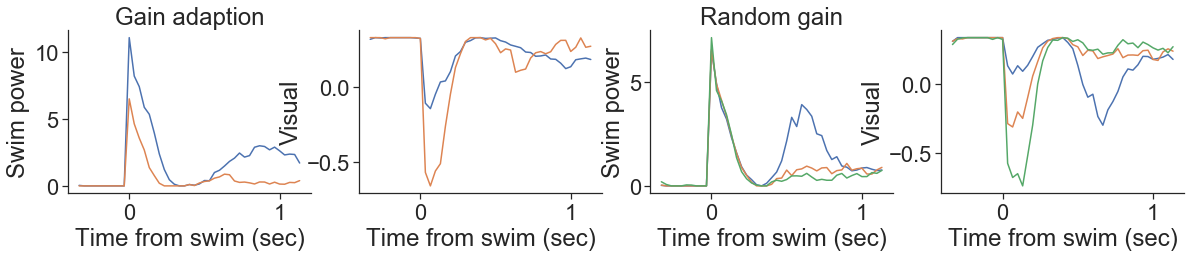

08012019Fish1-3


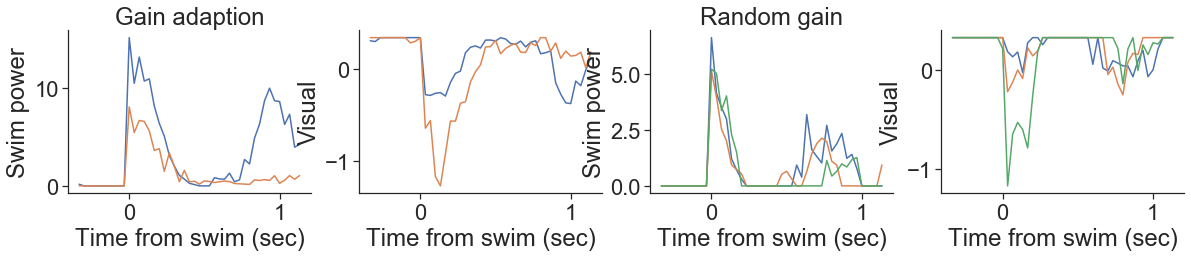

08012019Fish2-1


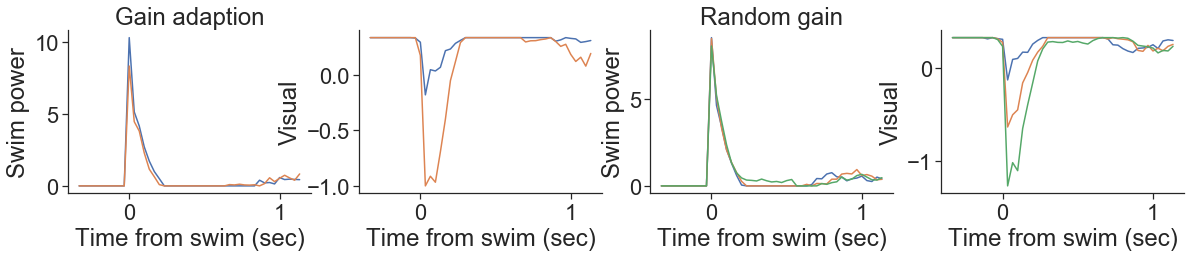

08012019Fish2-2


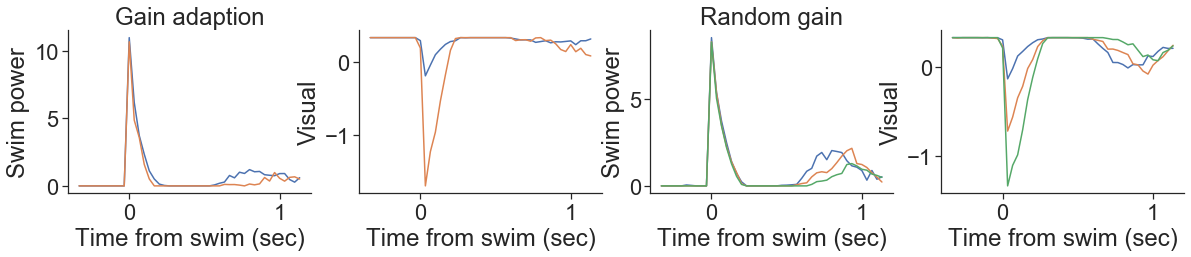

08012019Fish2-3


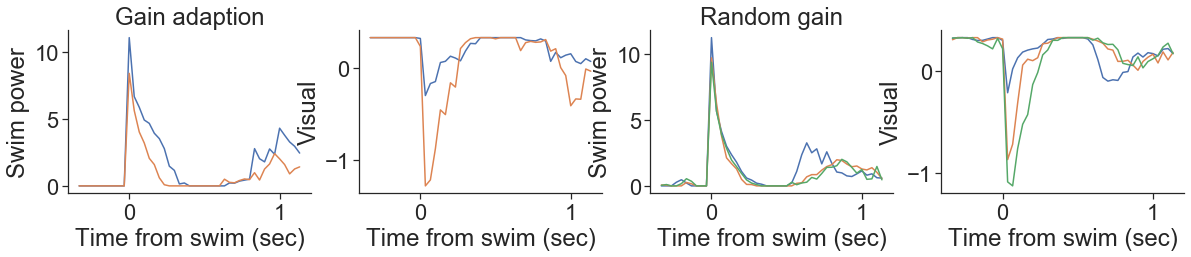

08012019Fish3-1


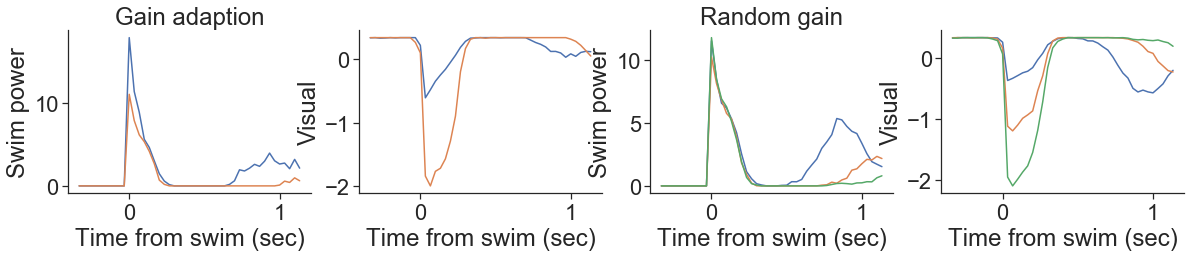

08012019Fish3-2


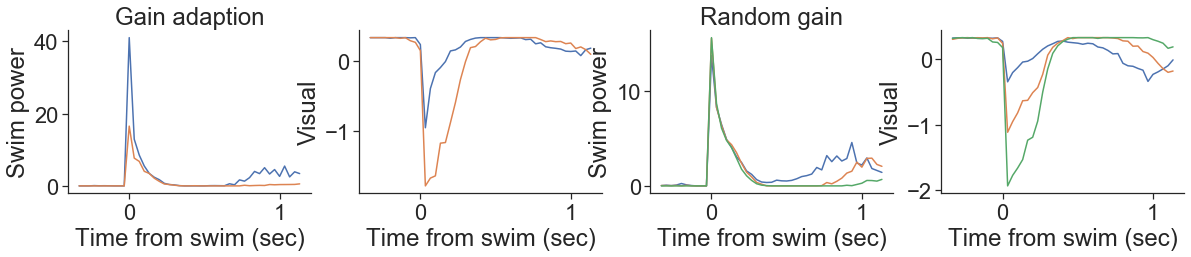

08012019Fish3-3


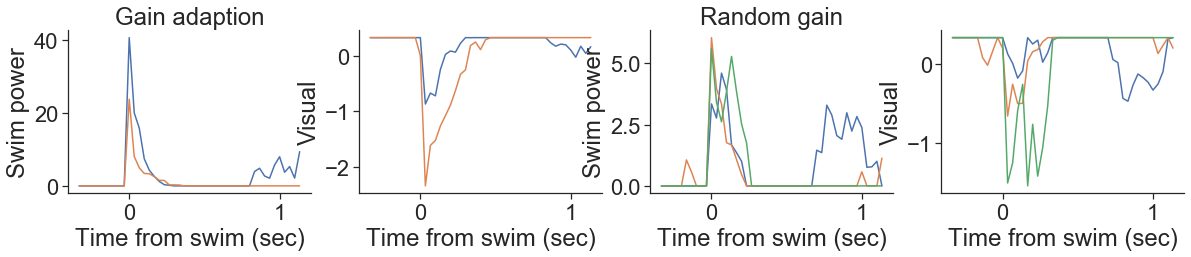

08012019Fish4-1


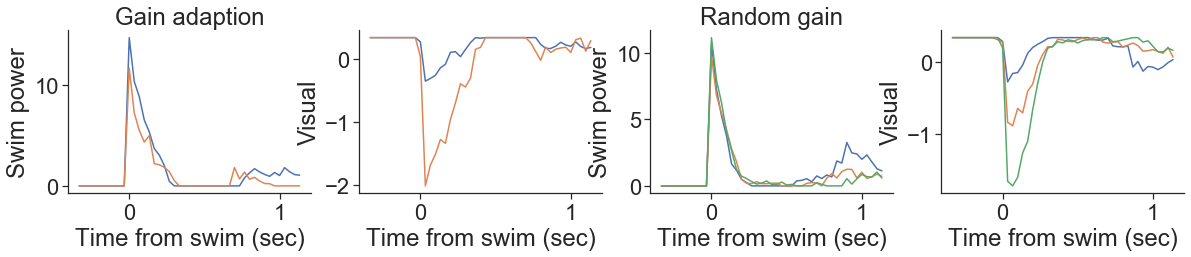

08012019Fish4-2


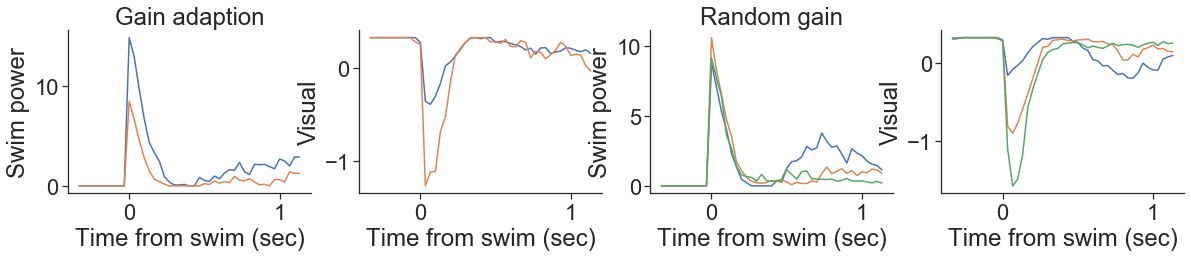

08012019Fish4-3


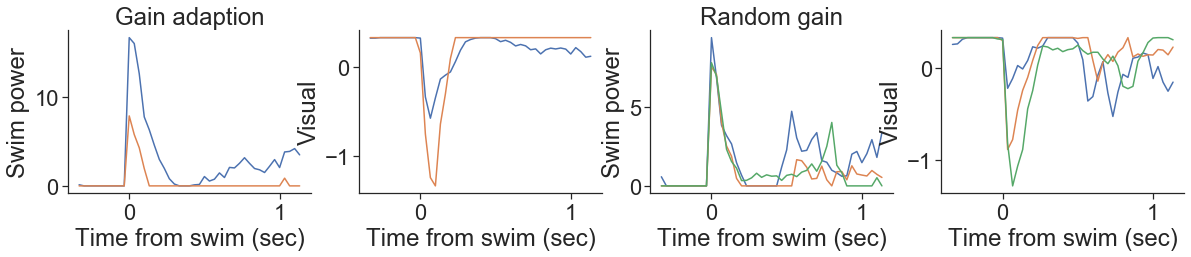

In [6]:
for _, row in dat_xls_file.iterrows():
    folder = row['folder']
    fish = row['fish']
    task_type = row['task']
    if 'Delay' in task_type:
        continue
    _ = np.load(f'../Analysis/swim_power/{folder}_{fish}_swim_dat.npz')
    r_swim = _['r_swim']
    l_swim = _['l_swim']
    task_period = _['task_period'].astype('int')
    task_period_ = _['swim_task_index'].astype('int')
    visu = _['visu']
    p_swim = r_swim + l_swim
    swim_starts = _['swim_starts']
    swim_ends = _['swim_ends']
    swim_len = swim_ends - swim_starts
    valid_trial = (swim_len>1) & (p_swim.sum(axis=-1)>0)
    print(folder + fish)
    fig, ax = plt.subplots(1, 4, figsize=(20, 3))
    ax[0].plot(np.arange(-t_pre, t_post)/30, p_swim[valid_trial & (task_period==1)].mean(axis=0))
    ax[0].plot(np.arange(-t_pre, t_post)/30, p_swim[valid_trial & (task_period==3)].mean(axis=0))
    sns.despine()
    ax[0].set_xlabel('Time from swim (sec)')
    ax[0].set_ylabel('Swim power')
    ax[0].set_title('Gain adaption')
    for n in range(3):
        ax[2].plot(np.arange(-t_pre, t_post)/30, p_swim[valid_trial & (task_period_==4+n)].mean(axis=0))
    sns.despine()
    ax[2].set_xlabel('Time from swim (sec)')
    ax[2].set_ylabel('Swim power')
    ax[2].set_title('Random gain')
    ax[1].plot(np.arange(-t_pre, t_post)/30, visu[valid_trial & (task_period==1)].mean(axis=0))
    ax[1].plot(np.arange(-t_pre, t_post)/30, visu[valid_trial & (task_period==3)].mean(axis=0))
    sns.despine()
    ax[1].set_xlabel('Time from swim (sec)')
    ax[1].set_ylabel('Visual')
    for n in range(3):
        ax[3].plot(np.arange(-t_pre, t_post)/30, visu[valid_trial & (task_period_==4+n)].mean(axis=0))
    sns.despine()
    ax[3].set_xlabel('Time from swim (sec)')
    ax[3].set_ylabel('Visual')
    plt.show()